### Use the dataset UsArrests.csv included in this folder to generate a similar in-depth PCA report of the data. Explore as much as you can, motivate the pre-processing steps you take, and interpret the outcomes of any analyses.

In [38]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pca import pca

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
%matplotlib inline

arrests_df = pd.read_csv("UsArrests.csv")#,index_col='Country')
arrests_df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.200,236,58,21.200
1,Alaska,10.000,263,48,44.500
2,Arizona,8.100,294,80,31.000
3,Arkansas,8.800,190,50,19.500
4,California,9.000,276,91,40.600


In [3]:
# Obtaining information from the dataframe.

arrests_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


#### Let's clean the data.

In [4]:
# Checkng the spelling in the City column

arrests_df['City'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [5]:
# Counting missing values.

missing = arrests_df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing

,missing
City,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


In [6]:
# Checking for weird entries.

arrests_df['Murder'].unique()

array([13.2, 10. ,  8.1,  8.8,  9. ,  7.9,  3.3,  5.9, 15.4, 17.4,  5.3,
        2.6, 10.4,  7.2,  2.2,  6. ,  9.7,  2.1, 11.3,  4.4, 12.1,  2.7,
       16.1,  4.3, 12.2,  7.4, 11.4, 11.1, 13. ,  0.8,  7.3,  6.6,  4.9,
        6.3,  3.4, 14.4,  3.8, 12.7,  3.2,  8.5,  4. ,  5.7,  6.8])

In [7]:
# Checking for weird entries.

arrests_df['Assault'].unique()

array([236, 263, 294, 190, 276, 204, 110, 238, 335, 211,  46, 120, 249,
       113,  56, 115, 109,  83, 300, 149, 255,  72, 259, 178, 102, 252,
        57, 159, 285, 254, 337,  45, 151, 106, 174, 279,  86, 188, 201,
        48, 156, 145,  81,  53, 161], dtype=int64)

In [8]:
# Checking for weird entries.

arrests_df['UrbanPop'].unique()

array([58, 48, 80, 50, 91, 78, 77, 72, 60, 83, 54, 65, 57, 66, 52, 51, 67,
       85, 74, 44, 70, 53, 62, 81, 56, 89, 86, 45, 75, 68, 87, 59, 32, 63,
       73, 39], dtype=int64)

In [9]:
# Checking for weird entries.

arrests_df['Rape'].unique()

array([21.2, 44.5, 31. , 19.5, 40.6, 38.7, 11.1, 15.8, 31.9, 25.8, 20.2,
       14.2, 24. , 21. , 11.3, 18. , 16.3, 22.2,  7.8, 27.8, 35.1, 14.9,
       17.1, 28.2, 16.4, 16.5, 46. ,  9.5, 18.8, 32.1, 26.1, 16.1,  7.3,
       21.4, 20. , 29.3,  8.3, 22.5, 12.8, 26.9, 25.5, 22.9, 11.2, 20.7,
       26.2,  9.3, 10.8, 15.6])

#### There are no weird entries. Now, we change the integer data type into float data type.

In [10]:
arrests_df['Assault'] = arrests_df['Assault'].apply(np.float64)
arrests_df['UrbanPop'] = arrests_df['UrbanPop'].apply(np.float64)
arrests_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     float64
 3   UrbanPop  50 non-null     float64
 4   Rape      50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### Let's explore the dataframe.

In [11]:
# Checking statistical properties.

stats = arrests_df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose()
selected_stats

,mean,std,min,max
Murder,7.788,4.355510,0.8,17.4
Assault,170.760,83.337661,45.0,337.0
UrbanPop,65.540,14.474763,32.0,91.0
Rape,21.232,9.366385,7.3,46.0


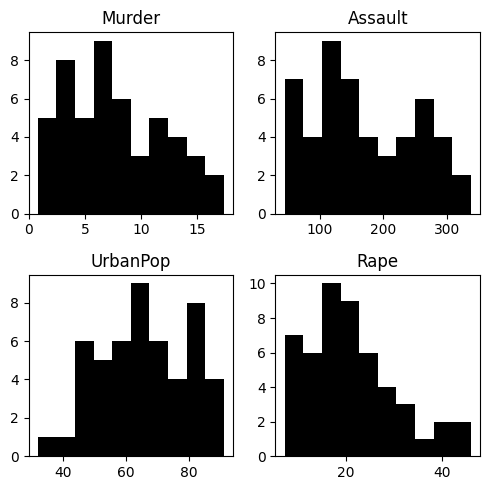

In [12]:
# Plotting histograms.

histograms = arrests_df.hist(color='black', grid=False, figsize=(5, 5))
plt.tight_layout()
plt.show()

#### We see that the Assaulta column has a very big mean and standard deviation so we have to standardise it, otherwise it will dominate in the biplot graph . But we will do that later.

#### Now, we check the correlation between features.

Below, we see that there is only a positive correlation between all the features. The features with the highest correlation are assault and murder; and rape and murder. The features with the lowest correlation are urbanpop and murder; and urbanpop and assault.

Here we see that the population does not affect the amount of murder that happens in a state. However, there is a small effect on the amount of assault and rape that happen in a state.

Also, there is a strong correlation between all the crimes, and assault is involved in the 2 higest correlations.

C:\Users\munas\AppData\Local\Temp\ipykernel_52048\2513706596.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_ut=np.triu(np.ones(corr_arrests_df.shape)).astype(np.bool)


<AxesSubplot: >

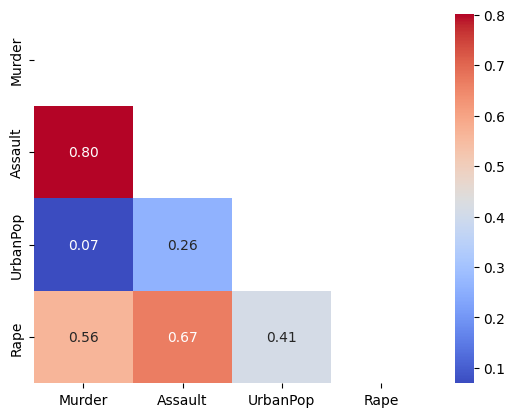

In [13]:
corr_arrests_df = arrests_df.drop(["City"],axis=1).corr()
labels =corr_arrests_df.columns

correlations = corr_arrests_df.corr()

mask_ut=np.triu(np.ones(corr_arrests_df.shape)).astype(np.bool)
sns.heatmap(corr_arrests_df, mask=mask_ut, cmap="coolwarm", fmt=".2f", annot=True)

### PCA.

We will standardise the data and then apply PCA to it.

In [14]:
# Selecting and standardising features.
X = StandardScaler().fit_transform(arrests_df.iloc[:,1:].values)

# Creating PCA.

pca = PCA()

# Obtaining components.
principal_components = pca.fit_transform(X)

# Transforming the components into a pandas data frame.
pca_df = pd.DataFrame(principal_components, index=arrests_df.iloc[:,1:].index)

# This is to include the country code  as the rownames in the PC's
pca_df.head()

,0,1,2,3
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


#### It's time to create a biplot.

From the plot which is below, we see that the urbanpop is the most important feature. Then murder, assault and rape, in this order.

The PC1 and PC2 are dividing the states evenly. All the features have a positive PC1 component. Urbanpop and rape have a negative PC2 component and murder and assault have a possitive PC2 component.

Most states are either in the left or the centre of the biplot, which means that they experience less crimes events. Also, all the states at the top have a rural population and the ones at the bottom have a urban population.

In [15]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots(figsize=(15, 15))    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = arrests_df['City'][i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

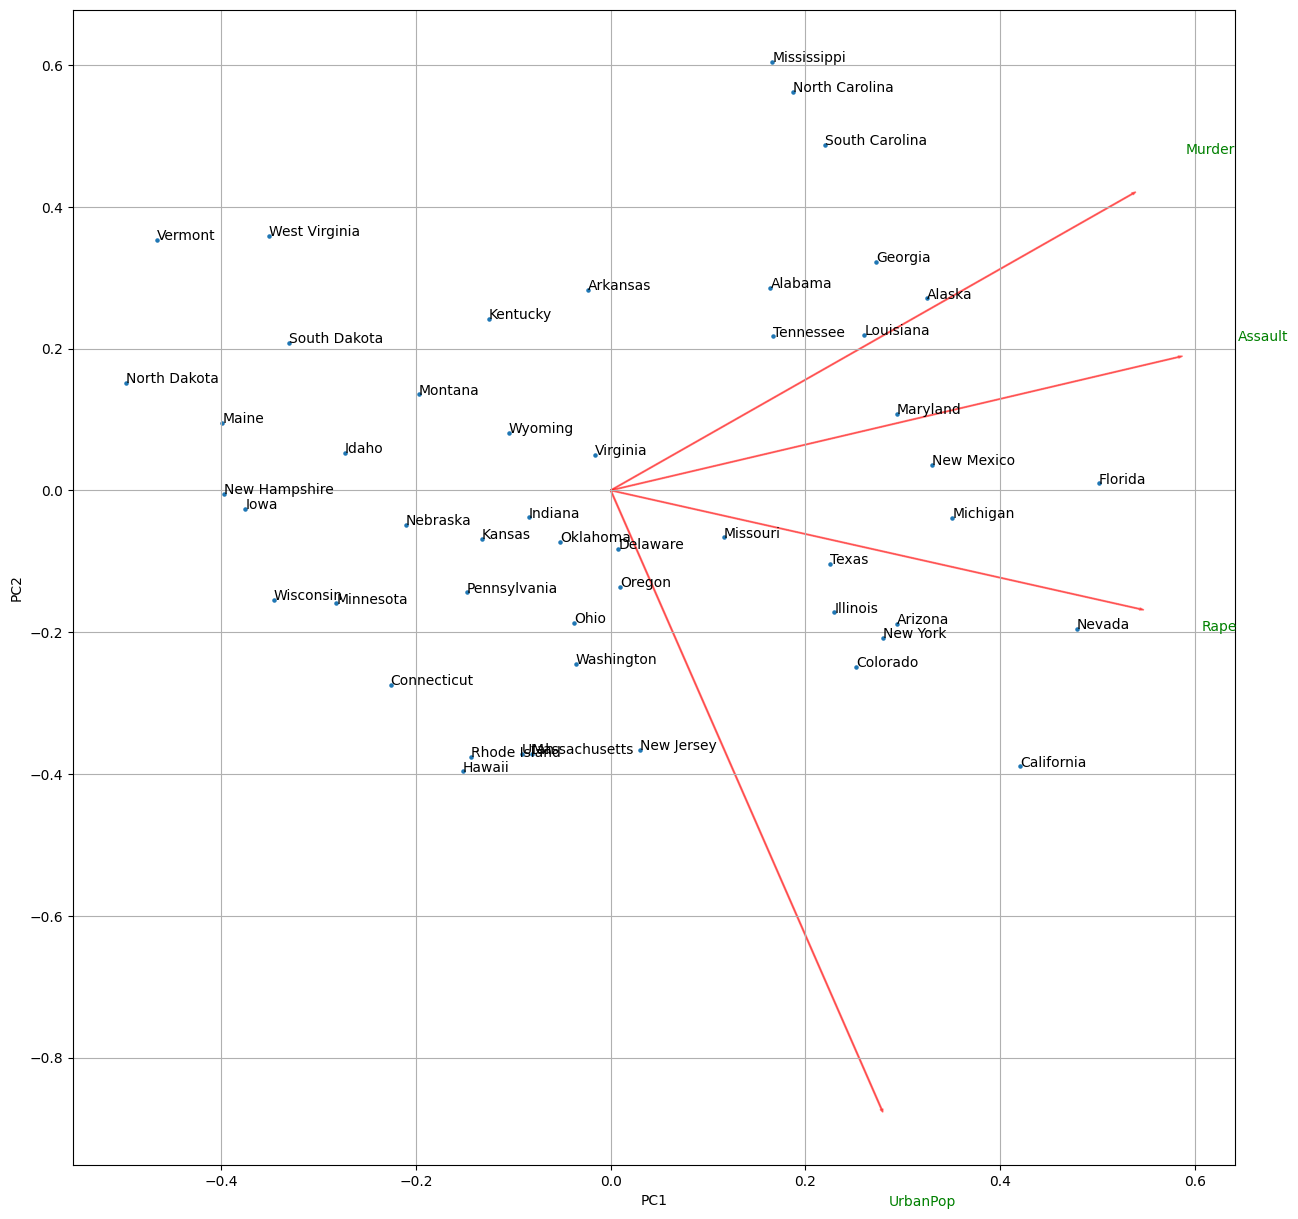

In [16]:
biplot(principal_components,np.transpose(pca.components_[0:2, :]),list(labels), arrests_df['City'])
plt.show()

#### We can see the PC1 and PC2 components of each feature, and this would be the result.

In [17]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

arrests_df_copy = arrests_df
arrests_df_copy = pd.DataFrame()
arrests_df_copy["Features"] = list(labels)
arrests_df_copy["PC1 Importance"] = pc1
arrests_df_copy["PC2 Importance"] = pc2
arrests_df_copy

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


#### Next, we create a cumulative variance plot.

Two components explain more than 85% of the variance. We can therefore use them to perform cluster analysis. We began with 4 and now we have 2 variables explaining most of the variability. 

Text(0.5, 1.0, 'Cumulative Explained Variance')

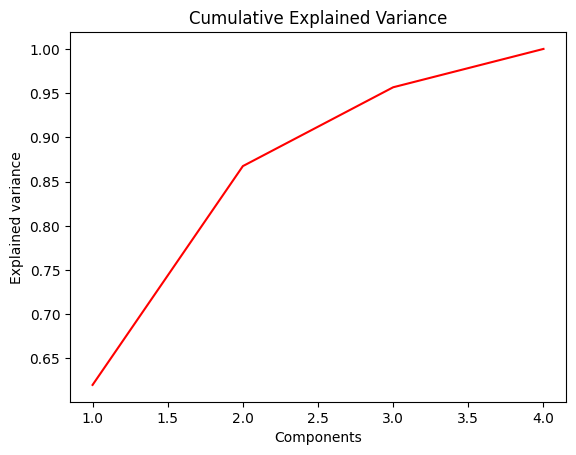

In [18]:
# Cumulative variance plot

plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1), np.cumsum(pca.explained_variance_ratio_), c='red')
plt.title("Cumulative Explained Variance")

### You are also required to do an application of two clustering techniques and an analysis of the clusters they generate. Try and see if you can find anything common within each cluster that has been found.

### Hierarchical clustering

From the dendrograms below, the complete linkage method creates the most balanced dispersion of clusters and will therefore be the method of choice for the analysis. A clearer dendrogram for the complete linkage method is shown after.

With k=4, the clusters are of size 10, 21, 11 and 8 respectively. The yellow cluster represents the countries that are at the left side, which are the states that experience less crimes. The green one represents the states from the centre. The red one represents the states from the bottom right side, these ones represent less crime than the states that are at top right side. Finally, the purple cluster represents the states from the top right side, the ones that experience more crime.

Now we can conclude that the hierarchical clustering method classifies the states depending on the amount experienced in the them.

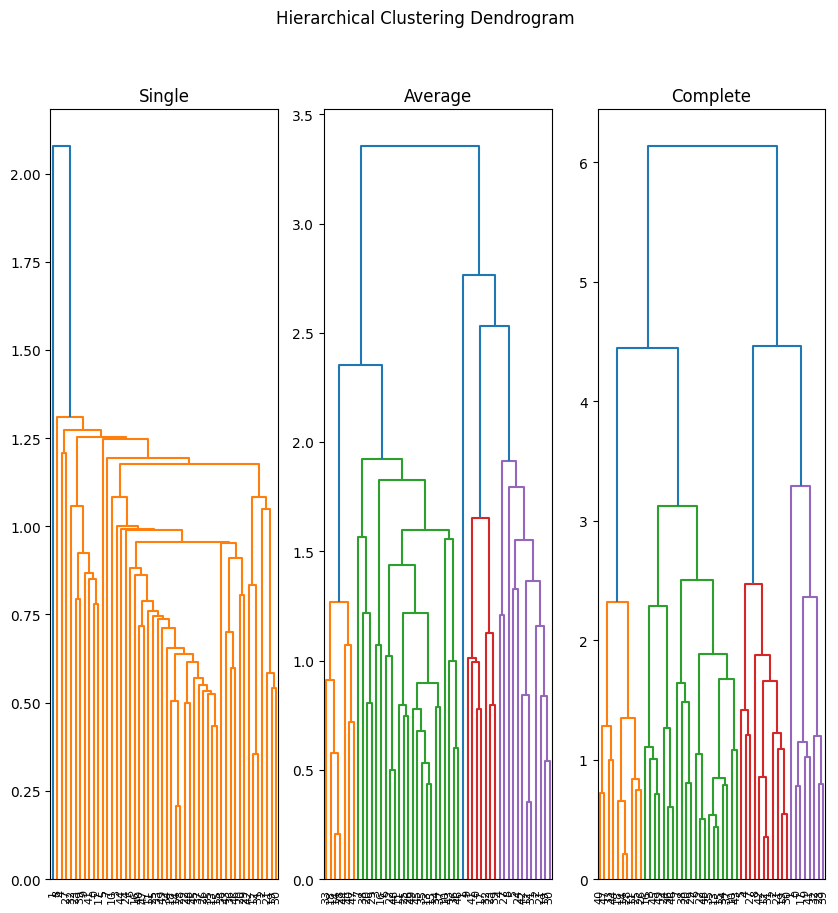

In [27]:
#pca_df = pd.DataFrame(X_std_trans[:,0:5], index = df.index)
#pca_df.head()

#model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
#model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10))
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.iloc[:,1:].index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.iloc[:,1:].index, ax=ax3)
plt.show()

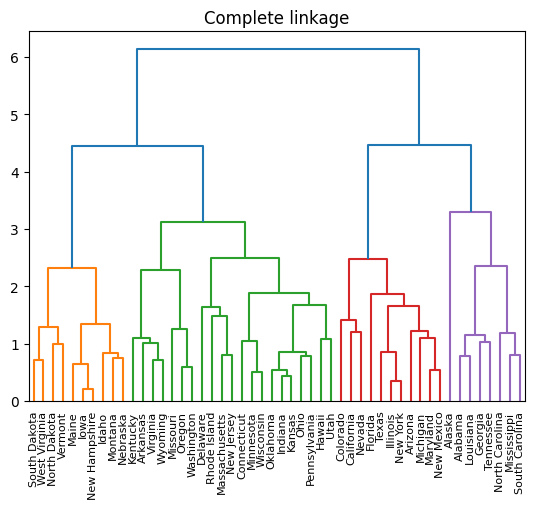

In [28]:
# Creating a new dataframe that will help us to see the name of the states in the dendogram.

arrests_df_new = arrests_df.set_index('City')
arrests_df_new.iloc[:,0]

# Selecting and standardising features.
X = StandardScaler().fit_transform(arrests_df_new.iloc[:,:].values)

# Creating PCA.

pca2 = PCA()

# Obtaining components.
principal_components = pca2.fit_transform(X)

# Transforming the components into a pandas data frame.
pca_df3 = pd.DataFrame(principal_components, index=arrests_df_new.iloc[:,:].index)

plt.title("Complete linkage")
dendrogram(linkage(pca_df3, method='complete'), labels=pca_df3.index)
plt.show()

### K–means

The silhouette of k=4 is bigger than k=3, so for the analysis, we will use k=4. 

It looks like the K-means method is dividing the states depending on the amount of crime experienced in the state. The left side experiences the least amount of crime, then the central area, next is the bottom right side and finally the top right side.

The hierarchical clustering and K-means grouped the countries together similarly. The are small differences like Alaska but in general it's a good prediction.

C:\Users\munas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


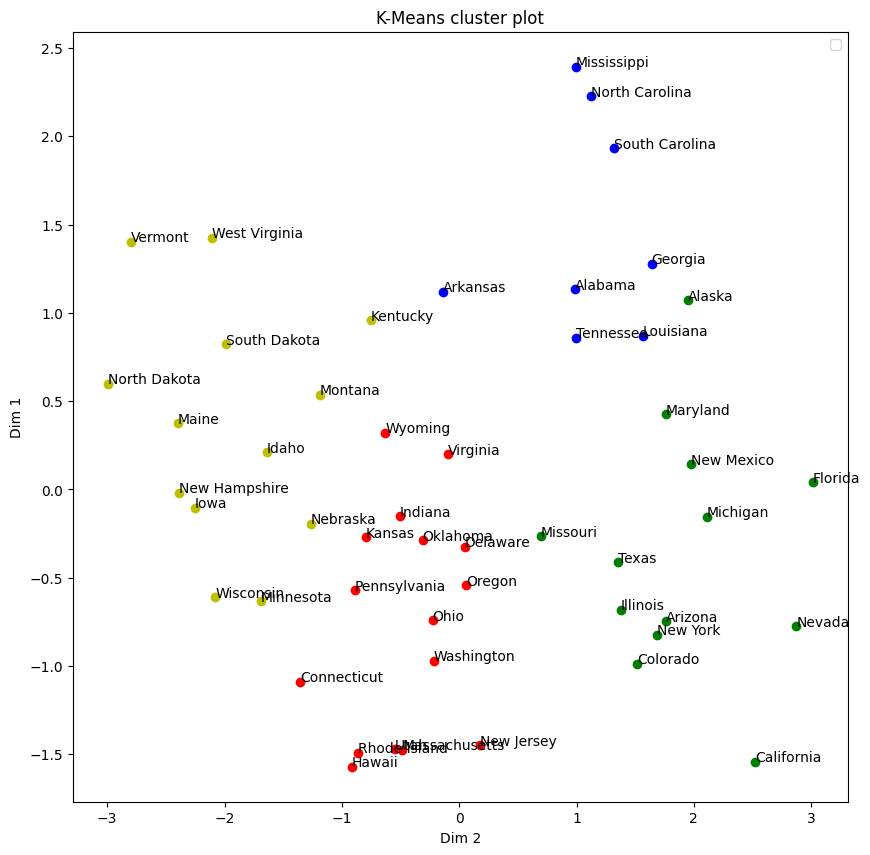

In [49]:
# Obtaining the name of the states.
states = arrests_df_new.index

# We extract the first two components
x = pca_df.iloc[:,0]
y = pca_df.iloc[:,1]

# Fit k-means
k=4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots(figsize=(10, 10))
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = states[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

In [53]:
# Calculating the silhouette. Here K=4.

Z = pca_df.iloc[:,0:2].values.reshape(-1,2)  
score = round(silhouette_score(Z, kmeans.labels_, metric='euclidean'),2)
print(f'For K=4 the silhouette={score}.')
print('For K=3 the silhouette=0.40.')

For K=4 the silhouette=0.42.
For K=3 the silhouette=0.40.


### Push all the work that you have generated for this project to GitHub.

I will do this in Task 53 because it teaches how to use GitHub.